<a href="https://colab.research.google.com/github/Galahexolion/Giliojo-mokymo-sistem-taikymai/blob/main/Lab11_GANs/Lab11_GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# --- 1. DUOMENŲ PARUOŠIMAS ---

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, Input, LeakyReLU
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm

def load_data():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Normalizuojame į intervalą [-1, 1], nes generatoriaus išėjime naudosime 'tanh'
    x_train = (x_train.astype(np.float32) - 127.5) / 127.5

    # Ištiesiname vaizdus (60000, 28, 28) -> (60000, 784)
    x_train = x_train.reshape(60000, 784)
    return (x_train, y_train, x_test, y_test)

(X_train, y_train, X_test, y_test) = load_data()
print(f"Mokymo duomenys: {X_train.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Mokymo duomenys: (60000, 784)


In [2]:
# --- 2. MODELIŲ KŪRIMAS ---

def adam_optimizer():
    # learning_rate=0.0002 ir beta_1=0.5 yra standartiniai nustatymai GAN'ams
    return Adam(learning_rate=0.0002, beta_1=0.5)

# Generatorius: Triukšmas -> Vaizdas
def create_generator():
    generator = Sequential()

    # Didiname dimensijas
    generator.add(Dense(units=256, input_dim=100))
    generator.add(LeakyReLU(0.2)) # LeakyReLU veikia geriau nei ReLU GAN'uose

    generator.add(Dense(units=512))
    generator.add(LeakyReLU(0.2))

    generator.add(Dense(units=1024))
    generator.add(LeakyReLU(0.2))

    # Išėjimas: 784 pikseliai (28x28). Tanh duoda reikšmes [-1, 1]
    generator.add(Dense(units=784, activation='tanh'))

    generator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return generator

# Diskriminatorius: Vaizdas -> Tikimybė (Tikras/Netikras)
def create_discriminator():
    discriminator = Sequential()

    discriminator.add(Dense(units=1024, input_dim=784))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3)) # Dropout padeda išvengti permokymo

    discriminator.add(Dense(units=512))
    discriminator.add(LeakyReLU(0.2))
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units=256))
    discriminator.add(LeakyReLU(0.2))

    # Išėjimas: 1 skaičius (0 = Fake, 1 = Real). Sigmoid duoda [0, 1]
    discriminator.add(Dense(units=1, activation='sigmoid'))

    discriminator.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return discriminator

# GAN: Sujungtas modelis (Generatorius -> Diskriminatorius)
def create_gan(discriminator, generator):
    discriminator.trainable = False # Mokant GAN'ą, diskriminatoriaus svoriai nekeičiami

    gan_input = Input(shape=(100,))
    x = generator(gan_input)
    gan_output = discriminator(x)

    gan = Model(inputs=gan_input, outputs=gan_output)
    gan.compile(loss='binary_crossentropy', optimizer=adam_optimizer())
    return gan

In [3]:
# --- 3. VIZUALIZACIJA ---
def plot_generated_images(epoch, generator, examples=100, dim=(10,10), figsize=(10,10)):
    noise = np.random.normal(loc=0, scale=1, size=[examples, 100])
    generated_images = generator.predict(noise, verbose=0)
    generated_images = generated_images.reshape(examples, 28, 28)

    plt.figure(figsize=figsize)
    for i in range(generated_images.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        # Atstatome spalvas vizualizacijai (iš [-1, 1] į [0, 1])
        plt.imshow((generated_images[i] + 1) / 2, cmap='gray', interpolation='nearest')
        plt.axis('off')
    plt.tight_layout()
    plt.suptitle(f"Epoch {epoch}", y=1.02)
    plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


100%|██████████| 128/128 [00:16<00:00,  7.66it/s]


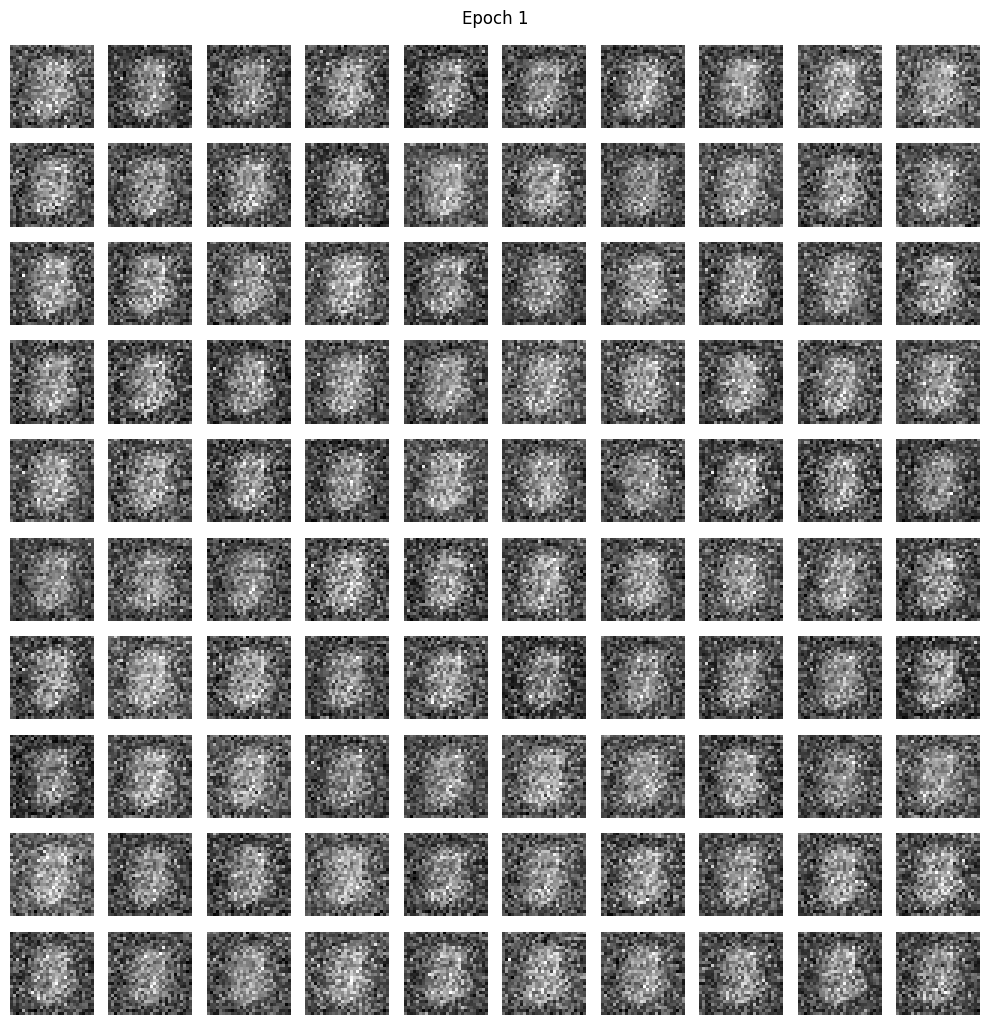

Epoch 2/50


100%|██████████| 128/128 [00:09<00:00, 13.19it/s]


Epoch 3/50


100%|██████████| 128/128 [00:08<00:00, 14.71it/s]


Epoch 4/50


100%|██████████| 128/128 [00:09<00:00, 13.26it/s]


Epoch 5/50


100%|██████████| 128/128 [00:09<00:00, 13.51it/s]


Epoch 6/50


100%|██████████| 128/128 [00:09<00:00, 13.73it/s]


Epoch 7/50


100%|██████████| 128/128 [00:09<00:00, 13.56it/s]


Epoch 8/50


100%|██████████| 128/128 [00:08<00:00, 14.72it/s]


Epoch 9/50


100%|██████████| 128/128 [00:09<00:00, 13.35it/s]


Epoch 10/50


100%|██████████| 128/128 [00:09<00:00, 13.55it/s]


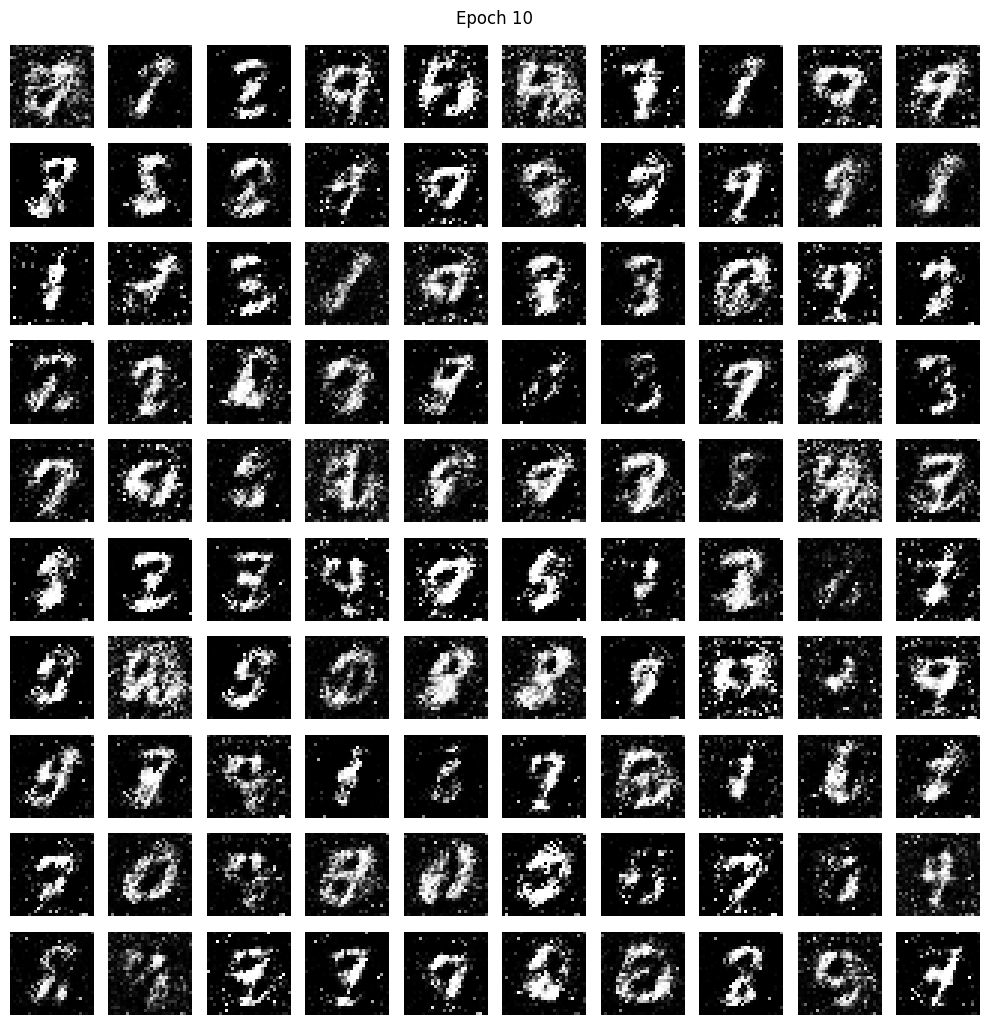

Epoch 11/50


100%|██████████| 128/128 [00:09<00:00, 13.32it/s]


Epoch 12/50


100%|██████████| 128/128 [00:09<00:00, 13.36it/s]


Epoch 13/50


100%|██████████| 128/128 [00:08<00:00, 14.37it/s]


Epoch 14/50


100%|██████████| 128/128 [00:09<00:00, 13.24it/s]


Epoch 15/50


100%|██████████| 128/128 [00:09<00:00, 13.50it/s]


Epoch 16/50


100%|██████████| 128/128 [00:09<00:00, 13.14it/s]


Epoch 17/50


100%|██████████| 128/128 [00:10<00:00, 12.15it/s]


Epoch 18/50


100%|██████████| 128/128 [00:08<00:00, 14.57it/s]


Epoch 19/50


100%|██████████| 128/128 [00:09<00:00, 13.26it/s]


Epoch 20/50


100%|██████████| 128/128 [00:09<00:00, 13.26it/s]


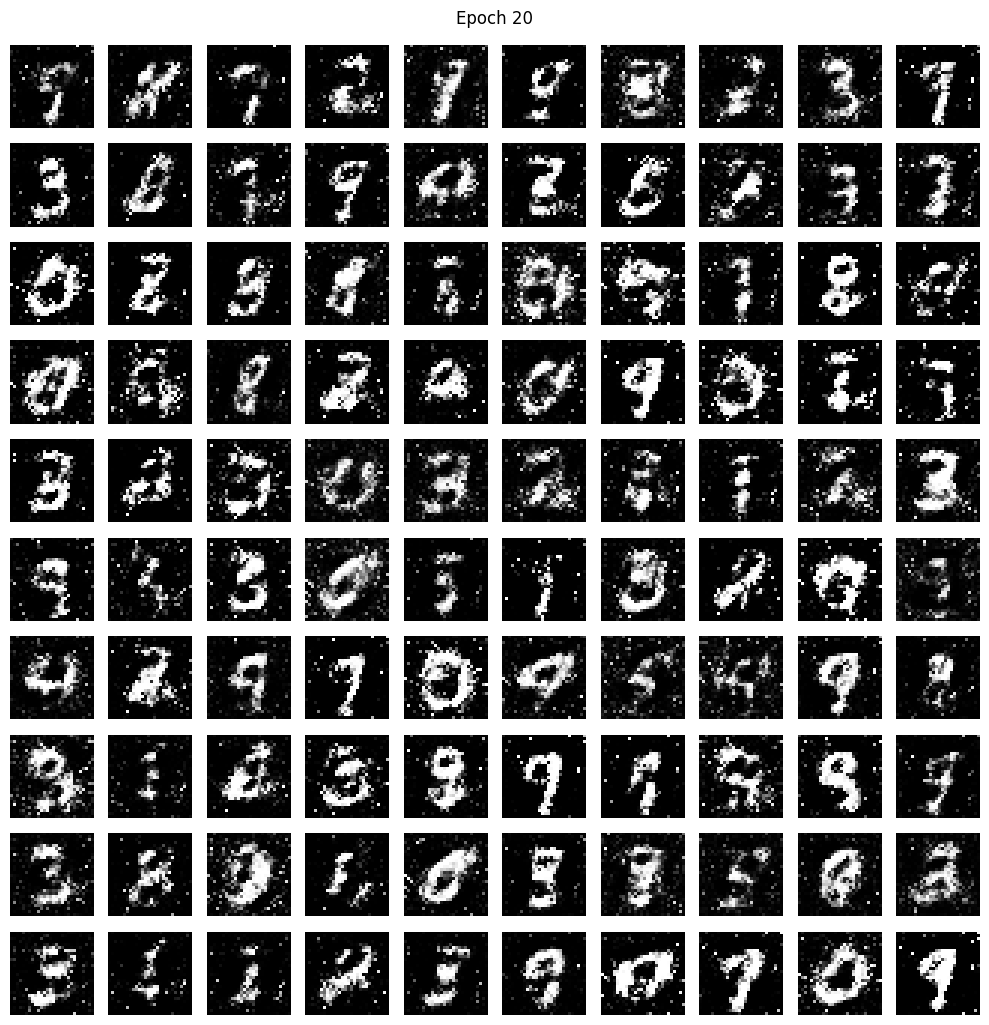

Epoch 21/50


100%|██████████| 128/128 [00:09<00:00, 13.34it/s]


Epoch 22/50


100%|██████████| 128/128 [00:09<00:00, 13.16it/s]


Epoch 23/50


100%|██████████| 128/128 [00:09<00:00, 12.81it/s]


Epoch 24/50


100%|██████████| 128/128 [00:09<00:00, 14.16it/s]


Epoch 25/50


100%|██████████| 128/128 [00:09<00:00, 12.91it/s]


Epoch 26/50


100%|██████████| 128/128 [00:09<00:00, 12.97it/s]


Epoch 27/50


100%|██████████| 128/128 [00:09<00:00, 13.20it/s]


Epoch 28/50


100%|██████████| 128/128 [00:09<00:00, 13.01it/s]


Epoch 29/50


100%|██████████| 128/128 [00:09<00:00, 13.80it/s]


Epoch 30/50


100%|██████████| 128/128 [00:09<00:00, 13.02it/s]


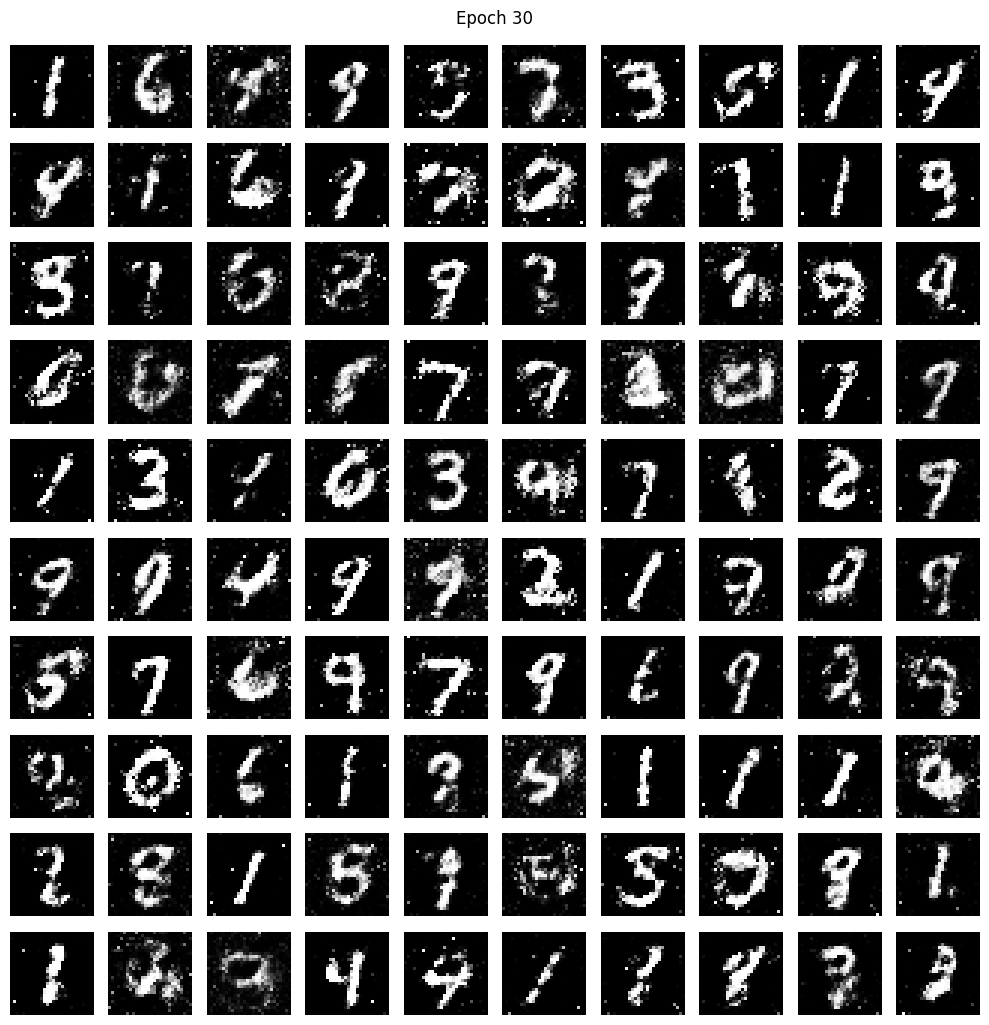

Epoch 31/50


100%|██████████| 128/128 [00:09<00:00, 12.87it/s]


Epoch 32/50


100%|██████████| 128/128 [00:09<00:00, 12.99it/s]


Epoch 33/50


100%|██████████| 128/128 [00:09<00:00, 13.04it/s]


Epoch 34/50


100%|██████████| 128/128 [00:09<00:00, 12.98it/s]


Epoch 35/50


100%|██████████| 128/128 [00:08<00:00, 14.31it/s]


Epoch 36/50


100%|██████████| 128/128 [00:09<00:00, 13.10it/s]


Epoch 37/50


100%|██████████| 128/128 [00:09<00:00, 13.08it/s]


Epoch 38/50


100%|██████████| 128/128 [00:09<00:00, 13.12it/s]


Epoch 39/50


100%|██████████| 128/128 [00:09<00:00, 13.35it/s]


Epoch 40/50


100%|██████████| 128/128 [00:08<00:00, 14.27it/s]


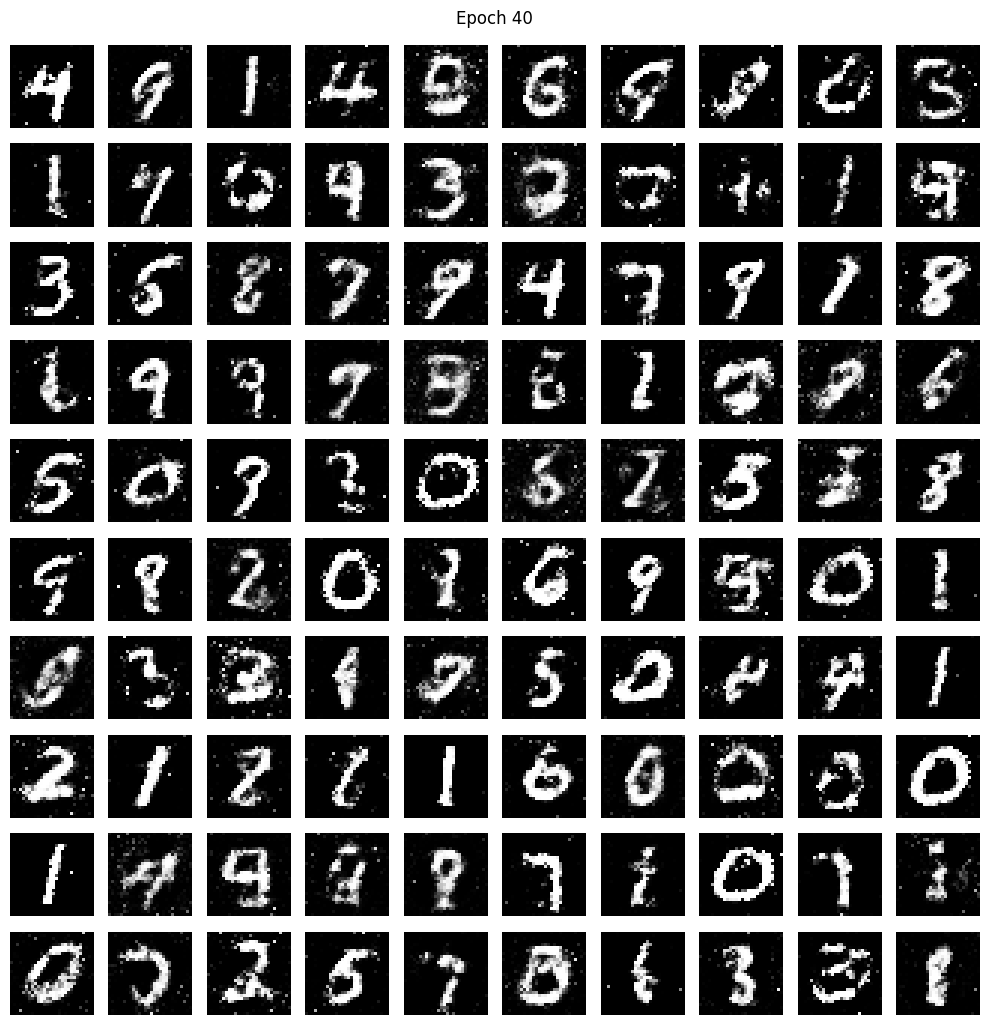

Epoch 41/50


100%|██████████| 128/128 [00:09<00:00, 13.40it/s]


Epoch 42/50


100%|██████████| 128/128 [00:09<00:00, 12.86it/s]


Epoch 43/50


100%|██████████| 128/128 [00:10<00:00, 12.68it/s]


Epoch 44/50


100%|██████████| 128/128 [00:09<00:00, 12.97it/s]


Epoch 45/50


100%|██████████| 128/128 [00:09<00:00, 13.50it/s]


Epoch 46/50


100%|██████████| 128/128 [00:09<00:00, 13.81it/s]


Epoch 47/50


100%|██████████| 128/128 [00:10<00:00, 11.92it/s]


Epoch 48/50


100%|██████████| 128/128 [00:09<00:00, 13.04it/s]


Epoch 49/50


100%|██████████| 128/128 [00:09<00:00, 13.02it/s]


Epoch 50/50


100%|██████████| 128/128 [00:10<00:00, 12.74it/s]


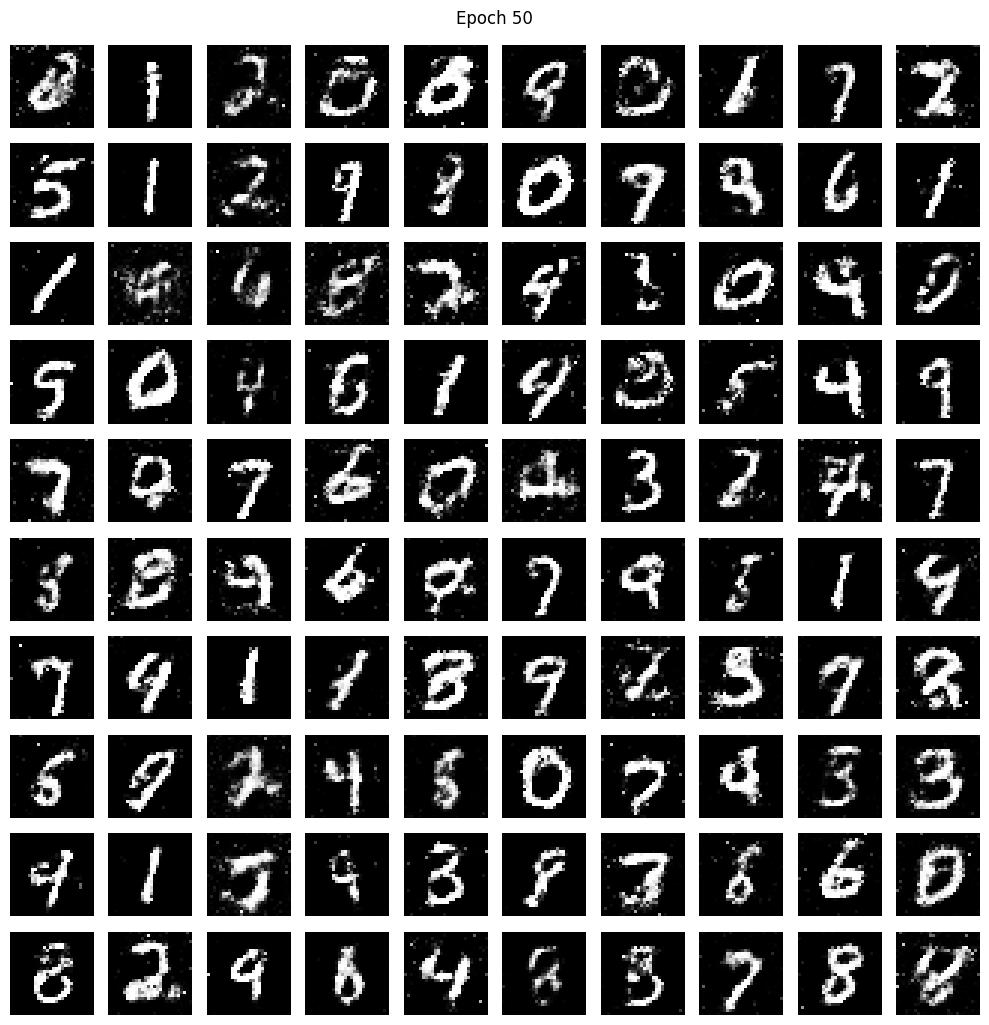

In [5]:
# --- 4. MOKYMAS (TRAINING LOOP) ---

def training(epochs=1, batch_size=128):

    # Sukuriame modelius
    g = create_generator()
    d = create_discriminator()
    gan = create_gan(d, g)

    # Rodyti struktūras
    # g.summary()
    # d.summary()

    for e in range(1, epochs + 1):
        print(f"Epoch {e}/{epochs}")

        # Jūsų pateiktame kode ciklas eina 'batch_size' kartų.
        # Tai reiškia viena "epocha" čia yra 128 žingsniai.
        for _ in tqdm(range(batch_size)):

            # 1. Sugeneruojame triukšmą
            noise = np.random.normal(0, 1, [batch_size, 100])

            # 2. Sugeneruojame netikrus vaizdus
            generated_images = g.predict(noise, verbose=0)

            # 3. Paimame tikrus vaizdus
            image_batch = X_train[np.random.randint(low=0, high=X_train.shape[0], size=batch_size)]

            # 4. Sujungiame (Tikri + Netikri)
            X_concat = np.concatenate([image_batch, generated_images])

            # 5. Sukuriame etiketes (Tikri=0.9, Netikri=0)
            # Naudojame 0.9 vietoj 1.0 (Label Smoothing), tai padeda stabilumui
            y_dis = np.zeros(2 * batch_size)
            y_dis[:batch_size] = 0.9

            # 6. Apmokome Diskriminatorių (atskirti tikrus nuo netikrų)
            d.trainable = True
            d.train_on_batch(X_concat, y_dis)

            # 7. Apmokome Generatorų (per GAN modelį)
            # Bandome apgauti diskriminatorių, sakydami, kad visi vaizdai yra tikri (1)
            noise = np.random.normal(0, 1, [batch_size, 100])
            y_gen = np.ones(batch_size)

            d.trainable = False # Užšaldome diskriminatorių
            gan.train_on_batch(noise, y_gen)

        # Atvaizduojame rezultatą kas 10 epochų (arba pirmą)
        if e == 1 or e % 10 == 0:
            plot_generated_images(e, g)

# --- PALEIDIMAS ---
# 50 epochų užteks pamatyti rezultatą (originale buvo 400, kas užtruks ilgai)
training(epochs=50, batch_size=128)